In [334]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from optimize import generate_med_points
from energy import energy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [335]:
# create a dummy 2D dataset
data = np.random.uniform(0, 15, (20, 2)) # num data, dimensions
bounds = [(0, 15) for _ in range(data.shape[1])] # bounds for each dimension
X_new = generate_med_points(num_points=5, existing_points=data, bounds=bounds, num_restarts=100)

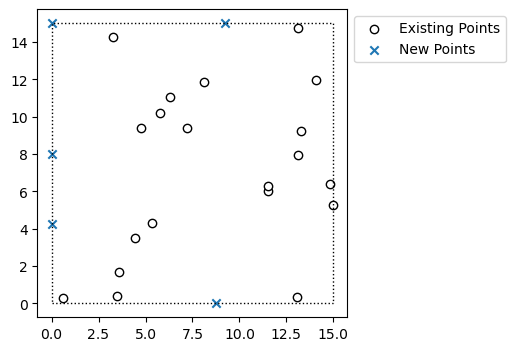

In [336]:
# visualize candidates

fig, ax = plt.subplots(figsize=(4,4), dpi=100)
plt.scatter(data[:, 0], data[:, 1], label="Existing Points", fc='w', ec='k')
plt.scatter(X_new[:, 0], X_new[:, 1], label="New Points", marker="x")

# add a rectangle to show the bounds
rect = plt.Rectangle((bounds[0][0], bounds[1][0]), bounds[0][1] - bounds[0][0], bounds[1][1] - bounds[1][0], fill=False, color='k', linestyle=':')
ax.add_patch(rect)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Energy Surface Visualization

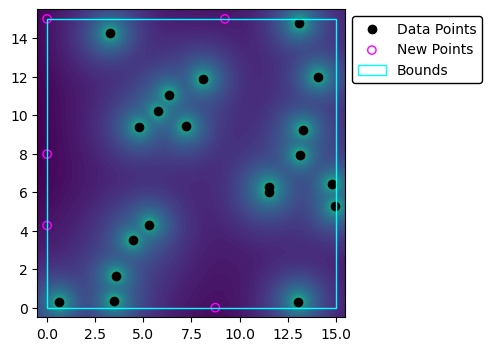

In [337]:
# create a grid of points within the bounds and evaluate the energy function
x = np.linspace(bounds[0][0]-0.5, bounds[0][1]+0.5, 100)
y = np.linspace(bounds[1][0]-0.5, bounds[1][1]+0.5, 100)
X, Y = np.meshgrid(x, y)

# flatten the grid and evaluate
grid_points = np.vstack([X.ravel(), Y.ravel()]).T
energy_values = energy(grid_points, data)

Z = energy_values.reshape(X.shape)
log_Z = np.log(Z)

# plot the energy function
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
ax.set_aspect('equal')
plt.contourf(X, Y, log_Z, levels=100, cmap='viridis')
# plt.colorbar(label='log(Energy)')
plt.scatter(data[:, 0], data[:, 1], c='k', label='Data Points')
plt.scatter(X_new[:, 0], X_new[:, 1], fc="None", ec='magenta', label='New Points')
rect = plt.Rectangle((bounds[0][0], bounds[1][0]), bounds[0][1]-bounds[0][0], bounds[1][1]-bounds[1][0], fill=False, color='cyan', lw=1, label='Bounds')
ax.add_patch(rect)
plt.legend(framealpha=1.0, edgecolor='black', facecolor='white', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
